In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

heart = pd.read_csv('/content/drive/Othercomputers/Il mio MacBook Pro/Progetti/ProgettiDS/statsmodel/Classificazione/Heart Attack/dataset/heart.csv')
heart.head()

Mounted at /content/drive


# **<p style="color:Orange;">About The Dataset :</p>**
    
age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable



In [2]:
heart = pd.read_csv('/Users/antoniobaio/Desktop/Progetti/ProgettiDS/statsmodel/Classificazione_clustering/Heart Attack/dataset/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [4]:
heart.drop_duplicates(keep='first', inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


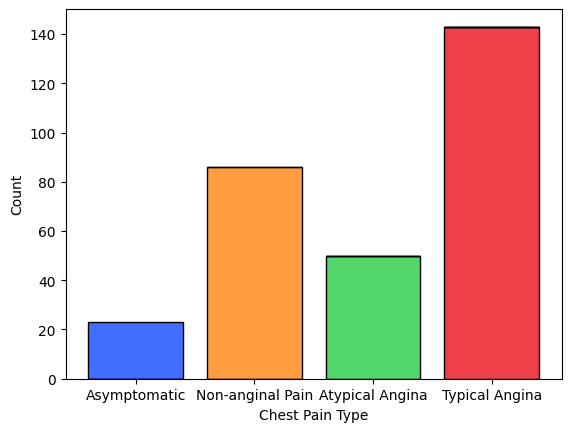

In [7]:
cp_map = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}

heart['cp'] = heart['cp'].replace(cp_map)

sns.histplot(data=heart, x='cp', hue='cp',
             multiple='stack', shrink=0.8, palette='bright',
             )
'''change x, y labels and hide legend'''
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend().set_visible(False)

1. Si può osservare che il dolore toracico di tipo 0, cioè l'angina tipica, è il più elevato.
2. Si può osservare che le persone hanno un dolore toracico di tipo 3, cioè "asintomatico" è il più basso.
3. Si può anche osservare che le persone con dolore toracico di tipo 0 sono quasi il 50% di tutte le persone.

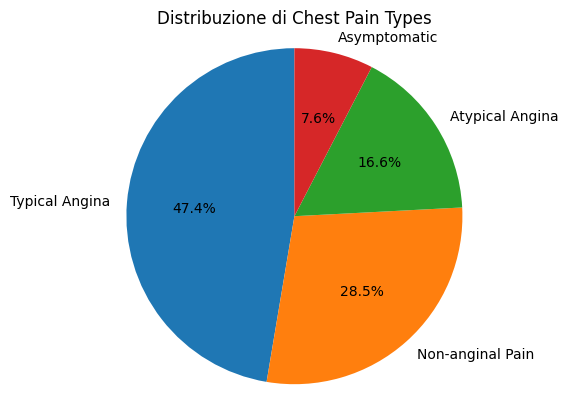

In [8]:
cp_map = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}

heart['cp'] = heart['cp'].replace(cp_map)

cp_counts = heart['cp'].value_counts()

labels = cp_counts.index
counts = cp_counts.values

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
ax.set_title('Distribuzione di Chest Pain Types')

plt.show()


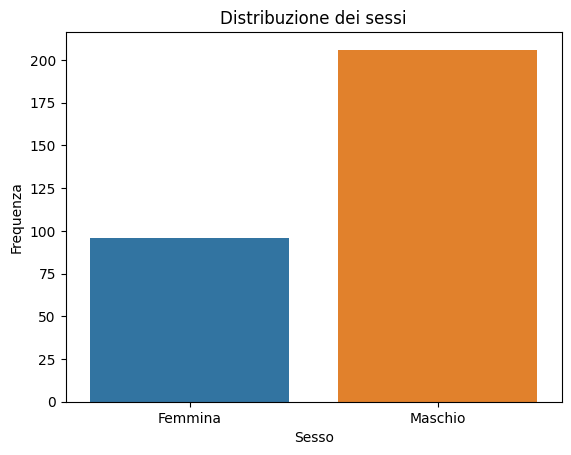

In [9]:
# Grafico a barre di sex
sns.countplot(x='sex', data=heart)
plt.xlabel('Sesso')
plt.ylabel('Frequenza')
plt.xticks([0, 1], ['Femmina', 'Maschio'])
plt.title('Distribuzione dei sessi')
plt.show()


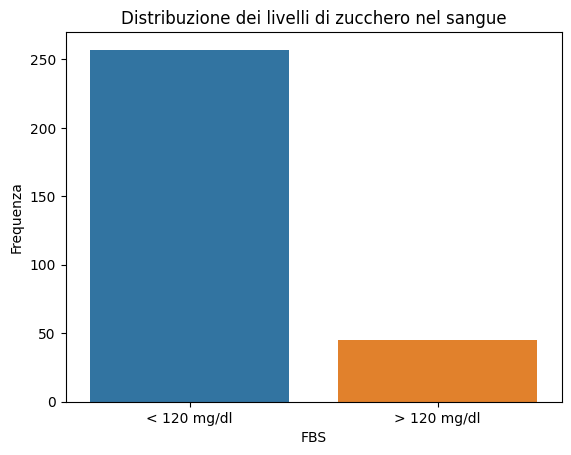

In [10]:
# Grafico a barre di fbs
sns.countplot(x='fbs', data=heart)
plt.xlabel('FBS')
plt.ylabel('Frequenza')
plt.xticks([0, 1], ['< 120 mg/dl', '> 120 mg/dl'])
plt.title('Distribuzione dei livelli di zucchero nel sangue')
plt.show()

<ipython-input-16-ff1c50ce4f81>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
<ipython-input-16-ff1c50ce4f81>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)


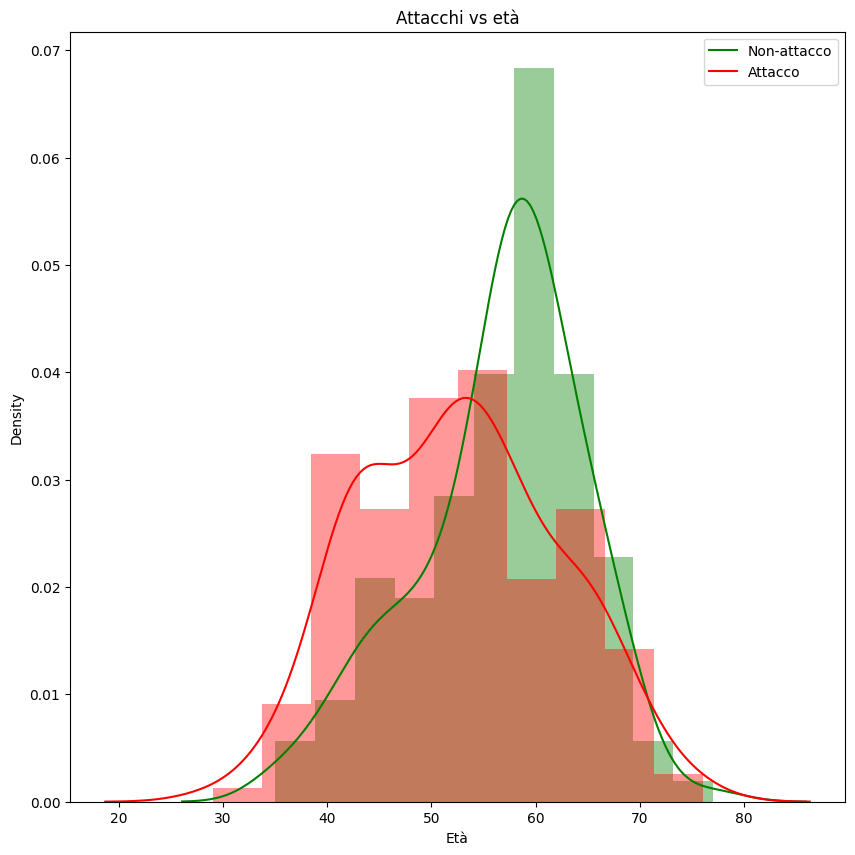

In [16]:
# Grafico attack versus age
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attacchi vs età')
plt.xlabel("Età")
plt.legend(labels=['Non-attacco', 'Attacco'])

plt.show()


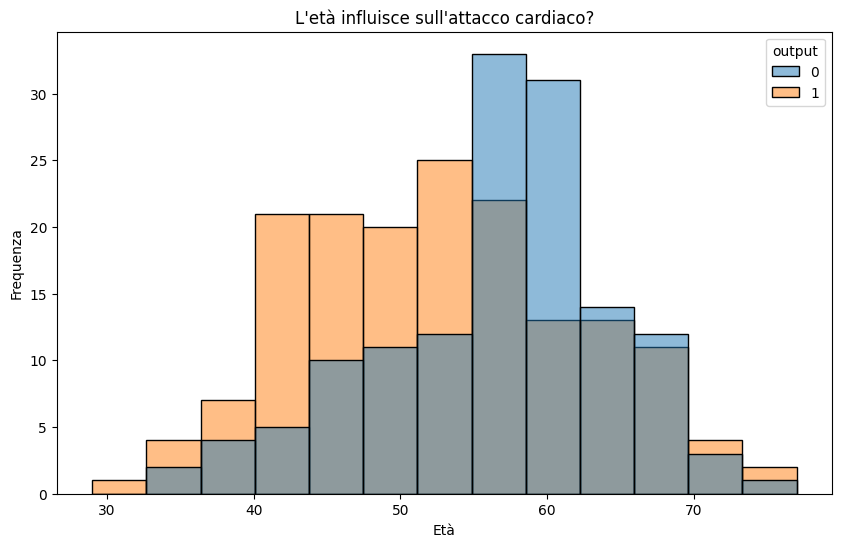

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data = heart, x = 'age', hue = 'output')
plt.title("L'età influisce sull'attacco cardiaco?")
plt.xlabel("Età")
plt.ylabel("Frequenza")

plt.show()

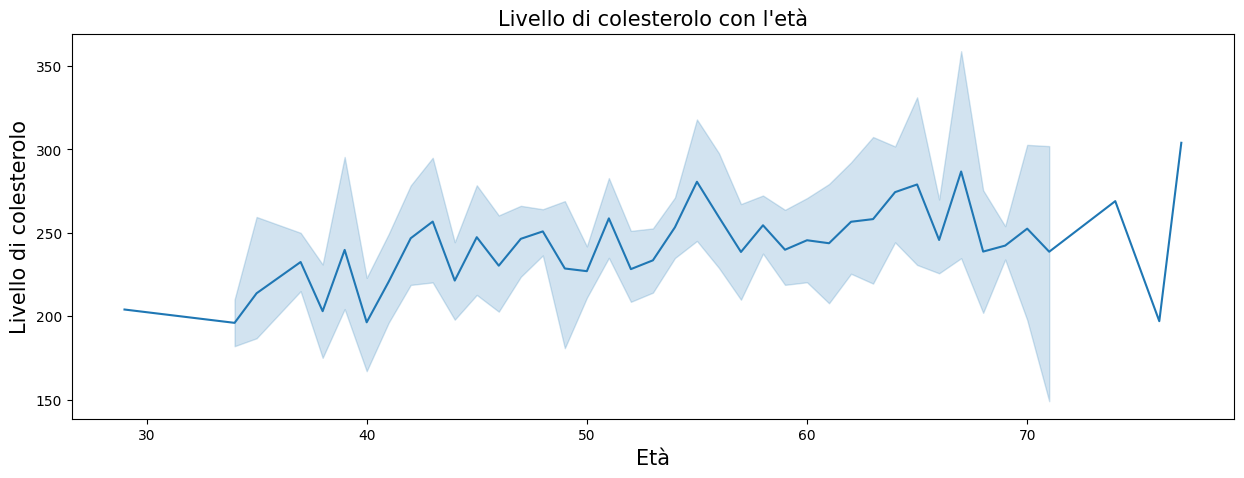

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(y="chol",x="age",data=heart)
plt.title("Livello di colesterolo con l'età",fontsize=15)
plt.xlabel("Età",fontsize=15)
plt.ylabel("Livello di colesterolo",fontsize=15)
plt.show()

In [2]:
heart = pd.read_csv('/Users/antoniobaio/Desktop/Progetti/ProgettiDS/statsmodel/Classificazione_clustering/Heart Attack/dataset/heart.csv')
heart.drop_duplicates(keep='first',inplace=True)

x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

x è una matrice di caratteristiche (feature matrix) che contiene tutte le colonne tranne output e y è un array contenente solo la colonna output. Questo significa che x contiene tutte le informazioni che usiamo per prevedere l'output.

In [3]:
'''split the data into train and test set'''

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)


In [4]:
'''shape of every split'''

print("The shape of x_train is ", x_train.shape)
print("The shape of x_test is ", x_test.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)

The shape of x_train is  (241, 12)
The shape of x_test is  (61, 12)
The shape of y_train is  (241,)
The shape of y_test is  (61,)


In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

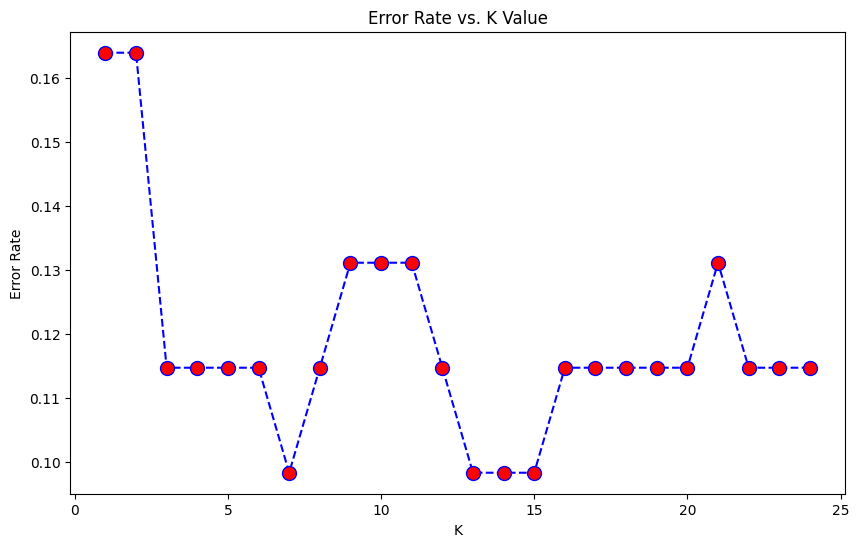

In [6]:
error_rate = []

for n in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)    
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), error_rate, color='blue', linestyle='dashed',
            marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


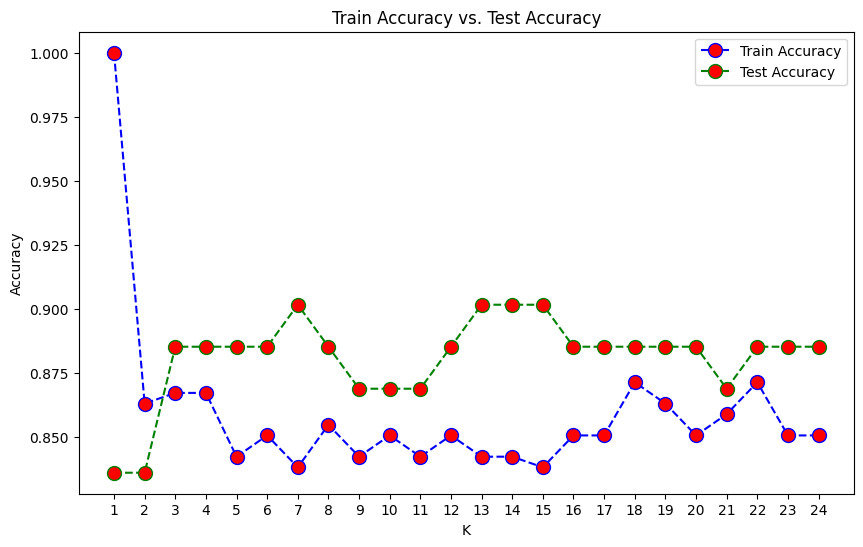

Best accuracy is 0.9016393442622951 with K = 7


In [7]:
train_accuracy = []
test_accuracy = []

for n in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)    
    y_pred = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), train_accuracy, color='blue', linestyle='dashed',
            marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1, 25), test_accuracy, color='green', linestyle='dashed',
            marker='o', markerfacecolor='red', markersize=10)
plt.title('Train Accuracy vs. Test Accuracy')
plt.xlabel('K')
plt.xticks(np.arange(1, 25, 1))
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

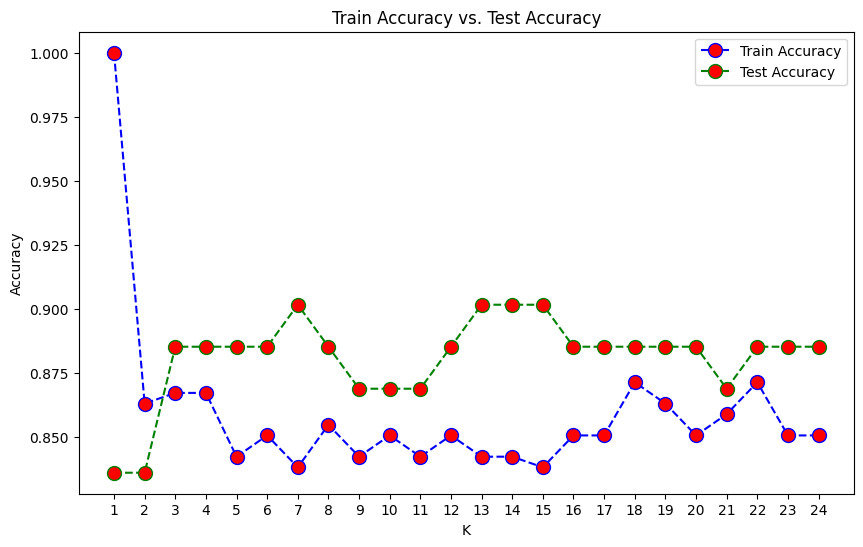

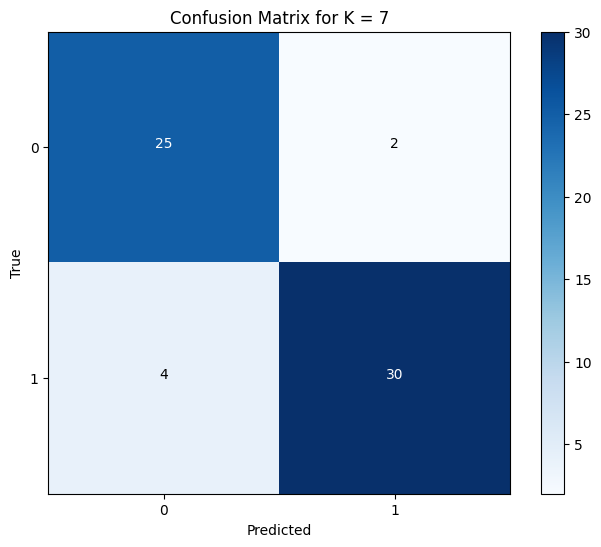

Best accuracy is 0.9016393442622951 with K = 7


In [8]:
from sklearn.metrics import confusion_matrix

train_accuracy = []
test_accuracy = []
confusion_matrices = []

for n in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

best_accuracy = np.max(test_accuracy)
best_k = 1 + test_accuracy.index(best_accuracy)
best_confusion_matrix = confusion_matrices[test_accuracy.index(best_accuracy)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), train_accuracy, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1, 25), test_accuracy, color='green', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Train Accuracy vs. Test Accuracy')
plt.xlabel('K')
plt.xticks(np.arange(1, 25, 1))
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(best_confusion_matrix, cmap='Blues')
plt.title('Confusion Matrix for K = {}'.format(best_k))
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[0, 1])

# Aggiungi i numeri all'interno delle celle
thresh = best_confusion_matrix.max() / 2.0
for i in range(best_confusion_matrix.shape[0]):
    for j in range(best_confusion_matrix.shape[1]):
        plt.text(j, i, best_confusion_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if best_confusion_matrix[i, j] > thresh else "black")

plt.show()

print("Best accuracy is {} with K = {}".format(best_accuracy, best_k))


Metrics for Best KNN (k = 7):
Accuracy: 0.9016393442622951
Precision: 0.9375
Recall: 0.8823529411764706
F1-score: 0.9090909090909091
Support: 61
Confusion Matrix:
[[25  2]
 [ 4 30]]


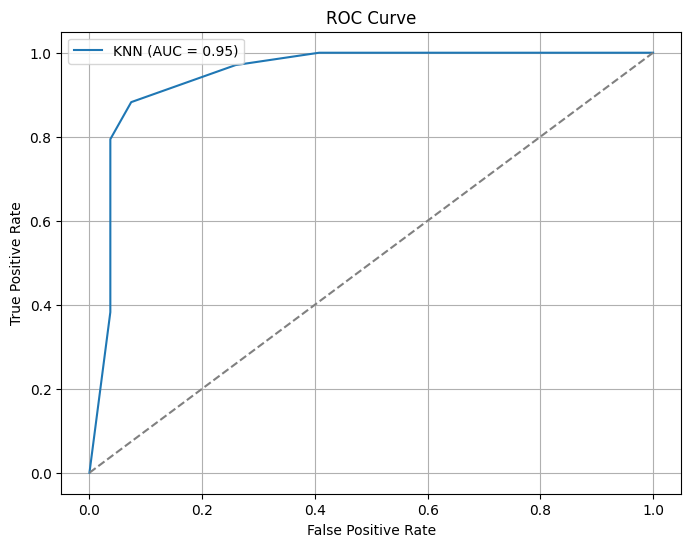

In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calcolo delle metriche per il caso migliore
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = best_knn.score(x_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
confusion_matrix = confusion_matrices[test_accuracy.index(best_accuracy)]

print("Metrics for Best KNN (k = {}):".format(best_k))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Support:", support)
print("Confusion Matrix:")
print(confusion_matrix)

# Curva ROC-AUC
plt.figure(figsize=(8, 6))
y_pred_prob = best_knn.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()


Accuracy of linear kernel is: 87.0 %
Accuracy of poly kernel is: 87.0 %
Accuracy of rbf kernel is: 92.0 %
Accuracy of sigmoid kernel is: 89.0 %


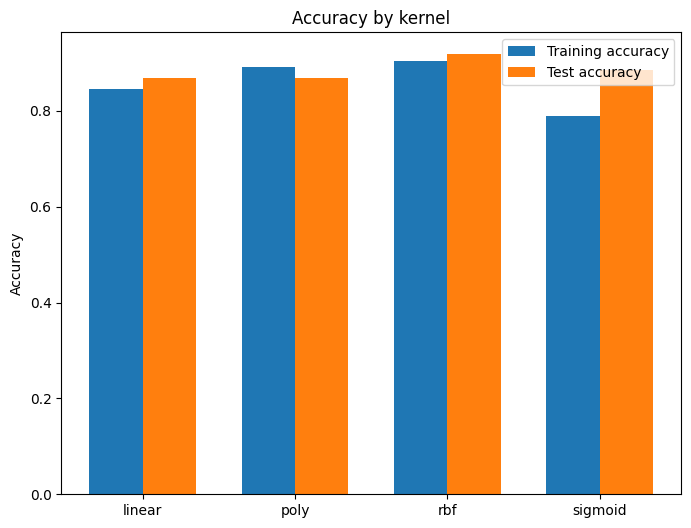

In [26]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_accuracy = []
test_accuracy = []

for k in kernel:
    model = SVC(kernel=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

    print('Accuracy of', k, 'kernel is:',
          round(accuracy_score(y_test, y_pred), 2) * 100, '%')

x = np.arange(len(kernel))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_accuracy, width, label='Training accuracy')
rects2 = ax.bar(x + width/2, test_accuracy, width, label='Test accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by kernel')
ax.set_xticks(x)
ax.set_xticklabels(kernel)
ax.legend()

plt.show()

Accuracy of linear kernel is: 87.0 %
Accuracy of poly kernel is: 87.0 %
Accuracy of rbf kernel is: 92.0 %
Accuracy of sigmoid kernel is: 89.0 %


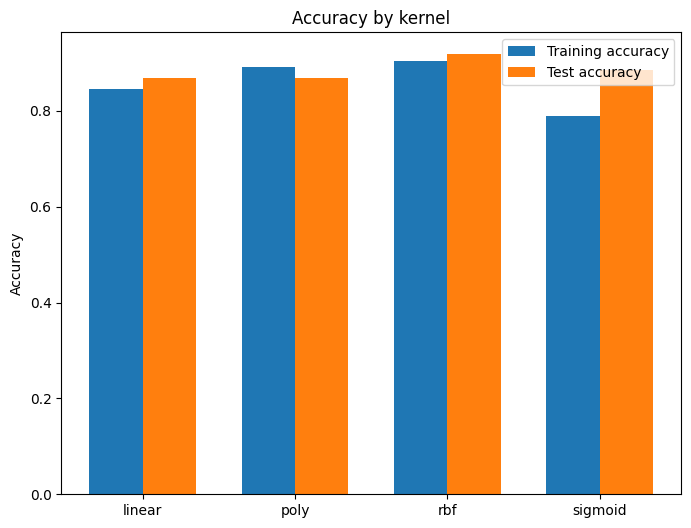

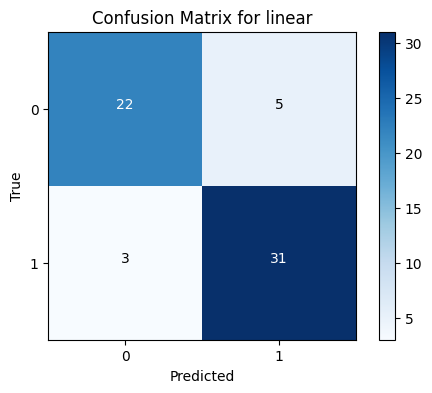

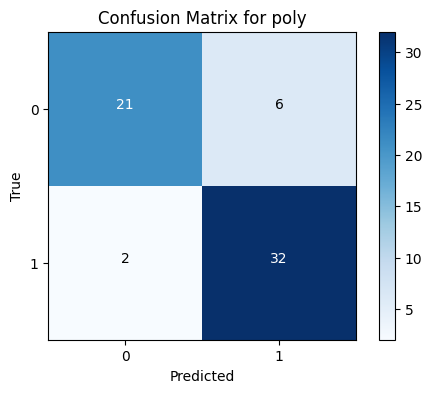

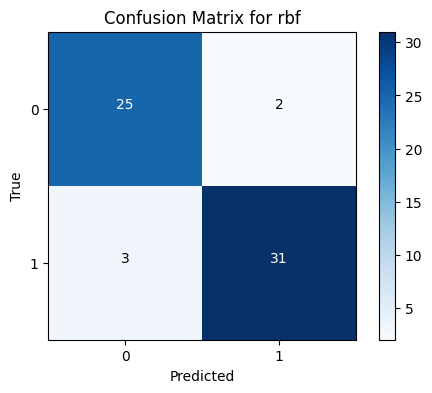

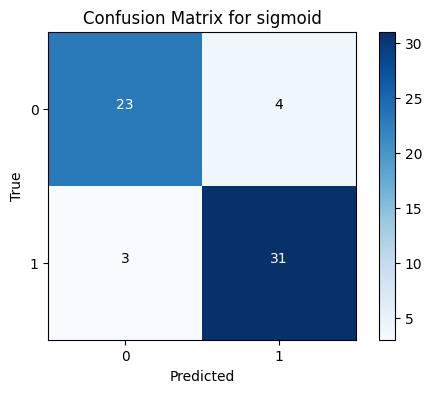

In [27]:
from sklearn.metrics import confusion_matrix

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_accuracy = []
test_accuracy = []
confusion_matrices = []

for k in kernel:
    model = SVC(kernel=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

    print('Accuracy of', k, 'kernel is:',
          round(accuracy_score(y_test, y_pred), 2) * 100, '%')

    confusion_matrices.append(confusion_matrix(y_test, y_pred))

x = np.arange(len(kernel))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_accuracy, width, label='Training accuracy')
rects2 = ax.bar(x + width/2, test_accuracy, width, label='Test accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by kernel')
ax.set_xticks(x)
ax.set_xticklabels(kernel)
ax.legend()

# Visualizza le matrici di confusione come immagini
for i, c_matrix in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 4))
    plt.imshow(c_matrix, cmap='Blues')
    plt.title('Confusion Matrix for {}'.format(kernel[i]))
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=[0, 1])
    plt.yticks(ticks=[0, 1])

    thresh = c_matrix.max() / 2.0
    for i in range(c_matrix.shape[0]):
        for j in range(c_matrix.shape[1]):
            plt.text(j, i, c_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if c_matrix[i, j] > thresh else "black")
    plt.show()


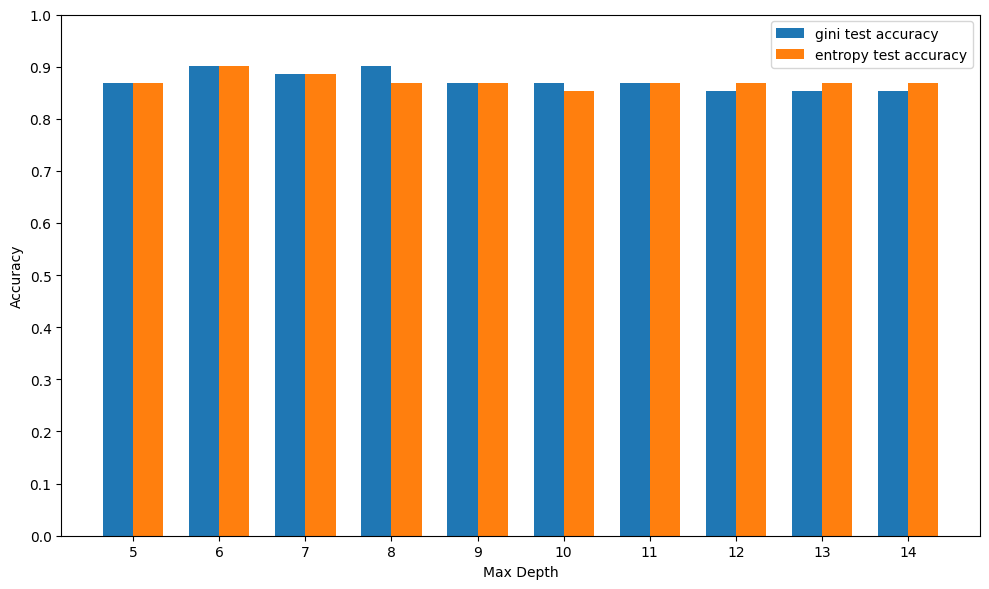

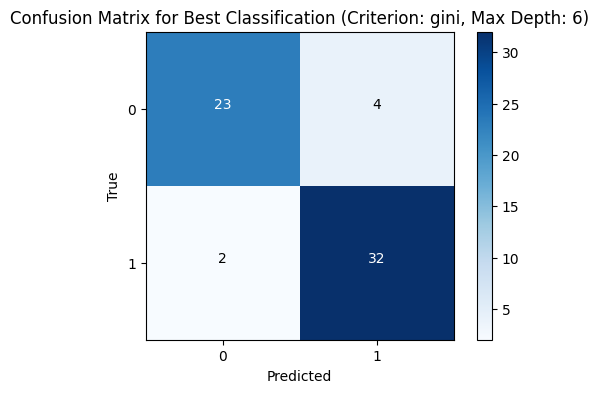

Best accuracy for gini: 0.9016393442622951
Best accuracy for entropy: 0.9016393442622951


In [28]:
criteria = ['gini', 'entropy']
max_depth_range = range(5, 15)

# initialize arrays for test accuracy
test_accuracy = np.zeros((len(criteria), len(max_depth_range)))

# loop over criteria and max depth range
for i, c in enumerate(criteria):
    for j, n in enumerate(max_depth_range):
        # define and train the model
        model = RandomForestClassifier(criterion=c, max_depth=n, random_state=0)
        model.fit(x_train, y_train)

        # compute test accuracy
        test_accuracy[i, j] = model.score(x_test, y_test)

# plot the bar chart
x = np.arange(len(max_depth_range))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects3 = ax.bar(x - width/2, test_accuracy[0, :], width, label='gini test accuracy')
rects4 = ax.bar(x + width/2, test_accuracy[1, :], width, label='entropy test accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xlabel('Max Depth')
ax.set_xticks(x)
ax.set_xticklabels(max_depth_range)
ax.legend()

fig.tight_layout()

plt.show()

best_index = np.unravel_index(np.argmax(test_accuracy), test_accuracy.shape)
best_criterion = criteria[best_index[0]]
best_max_depth = max_depth_range[best_index[1]]

# Define and train the model with the best parameters
best_model = RandomForestClassifier(criterion=best_criterion, max_depth=best_max_depth, random_state=0)
best_model.fit(x_train, y_train)

# Generate predictions using the best model
y_pred = best_model.predict(x_test)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title('Confusion Matrix for Best Classification (Criterion: {}, Max Depth: {})'.format(best_criterion, best_max_depth))
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[0, 1])

thresh = confusion_matrix.max() / 2.0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, confusion_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.show()

'''print the best accuracy for each criteria'''

print('Best accuracy for gini:', np.max(test_accuracy[0, :]))
print('Best accuracy for entropy:', np.max(test_accuracy[1, :]))


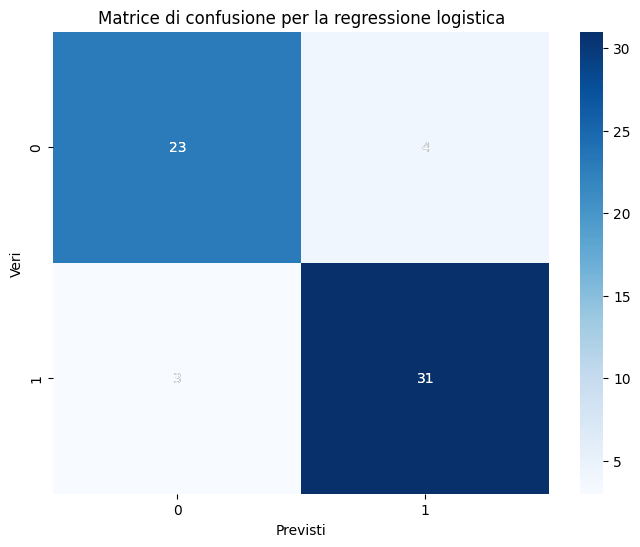

Confusion Matrix:
 [[23  4]
 [ 3 31]]
The accuracy of Logistic Regression is: 88.52459016393442 %


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Previsti')
plt.ylabel('Reali')
plt.title('Matrice di confusione per la regressione logistica')

# Stampa i valori di ogni categoria all'interno dell'immagine
categories = np.unique(y_test)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf[i, j], ha='center', va='center', color='white')

plt.show()

print("Confusion Matrix:\n", conf)
print("The accuracy of Logistic Regression is:", accuracy_score(y_test, predicted) * 100, "%")


The accuracy of Gaussian Naive Bayes model is:  88.52459016393442 %


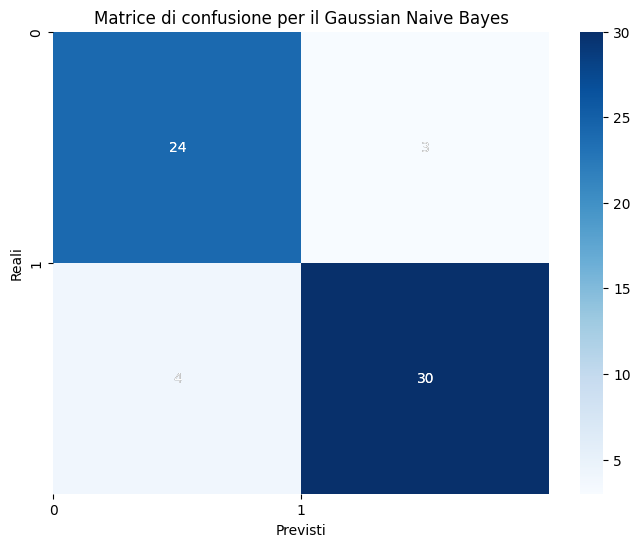

In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)

print("The accuracy of Gaussian Naive Bayes model is: ", accuracy * 100, "%")

# Create the confusion matrix
confusion = metrics.confusion_matrix(y_test, predicted)
classes = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks
plt.xlabel('Previsti')
plt.ylabel('Reali')
plt.title('Matrice di confusione per il Gaussian Naive Bayes')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

# Add values to the heatmap cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j + 0.5, i + 0.5, str(confusion[i, j]), ha='center', va='center', color='white')

plt.show()


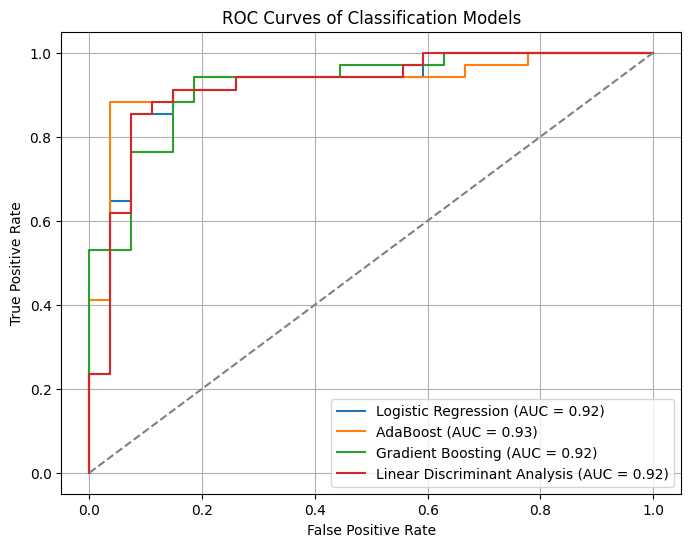

Detailed Metrics:
                          Model  Precision    Recall  F1-score  Support
0           Logistic Regression   0.885714  0.911765  0.898551       34
1                      AdaBoost   0.885714  0.911765  0.898551       34
2             Gradient Boosting   0.870968  0.794118  0.830769       34
3  Linear Discriminant Analysis   0.861111  0.911765  0.885714       34


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Inizializza i modelli di classificazione
models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Esegui il training dei modelli e calcola le metriche
classification_reports = []

plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    classification = classification_report(y_test, y_pred.round(), output_dict=True)
    classification_reports.append(classification)
    
    plt.plot(fpr, tpr, label=model_name + ' (AUC = %.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Classification Models')
plt.grid(True)
plt.legend()
plt.show()

# Creazione del DataFrame con le metriche di valutazione dettagliate
detailed_metrics = []
for model_name, classification in zip(models.keys(), classification_reports):
    precision = classification['1']['precision']
    recall = classification['1']['recall']
    f1 = classification['1']['f1-score']
    support = classification['1']['support']
    detailed_metrics.append([model_name, precision, recall, f1, support])

detailed_metrics_df = pd.DataFrame(detailed_metrics, columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])

# Stampa del DataFrame con le metriche di valutazione dettagliate
print("Detailed Metrics:")
print(detailed_metrics_df)


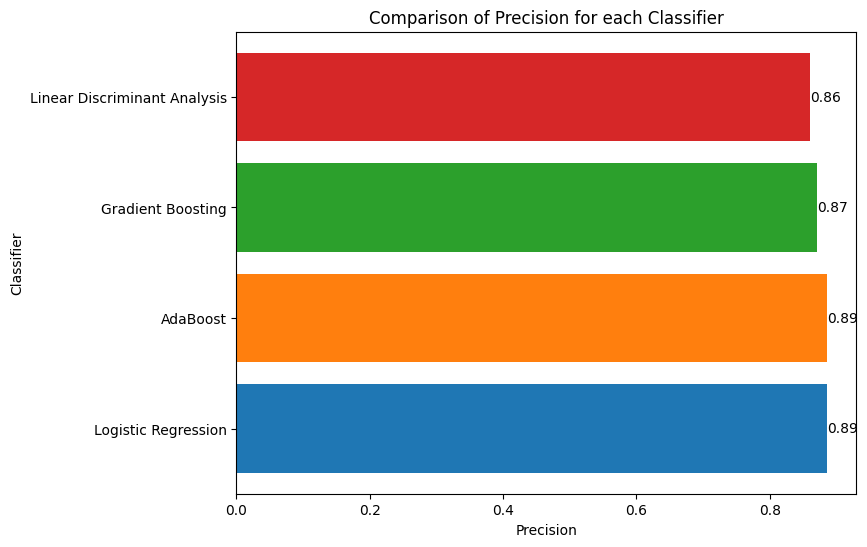

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Prendi i valori di precision dal DataFrame
precisions = detailed_metrics_df['Precision'].values
classifiers = detailed_metrics_df['Model'].values

# Creazione dei colori per le barre
colors = plt.cm.get_cmap('tab10')(np.arange(len(classifiers)))

# Creazione del grafico a barre orizzontali
plt.figure(figsize=(8, 6))
bars = plt.barh(classifiers, precisions, color=colors)

# Aggiunta dei valori delle barre all'interno del grafico
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width), ha='left', va='center')

plt.xlabel('Precision')
plt.ylabel('Classifier')
plt.title('Comparison of Precision for each Classifier')
plt.show()


In [37]:
# Algoritmi SVC
model1 = SVC(kernel="rbf")
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)

data = {
    'Model': [f'Support Vector Machine'],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1],
    'Support': [support]
}

detailed_metrics_df = pd.concat([detailed_metrics_df, pd.DataFrame(data)], ignore_index=True)

# Algoritmo RandomForest
model2 = RandomForestClassifier(criterion="gini", max_depth=6, random_state=0)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)

data = {
    'Model': [f'RandomForest'],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1],
    'Support': [support]
}

detailed_metrics_df = pd.concat([detailed_metrics_df, pd.DataFrame(data)], ignore_index=True)


In [38]:
detailed_metrics_df

,Model,Precision,Recall,F1-score,Support
0,Logistic Regression,0.885714,0.911765,0.898551,34
1,AdaBoost,0.885714,0.911765,0.898551,34
2,Gradient Boosting,0.870968,0.794118,0.830769,34
3,Linear Discriminant Analysis,0.861111,0.911765,0.885714,34
4,Support Vector Machine,0.939394,0.911765,0.925373,61
5,RandomForest,0.888889,0.941176,0.914286,61
